In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import itertools
import pandas as pd

In [2]:
vsv_data = np.array([1, .7, .49, .343, .0343]) # VSV Gradient
vsv_data_norm = vsv_data/np.sum(vsv_data)
vsv_data_norm


array([0.38951428, 0.27265999, 0.190862  , 0.1336034 , 0.01336034])

In [3]:
measles_data_mean = np.array([26800, 9100, 6700, 5400, 4000, 400]) # Measles (mGradient Mean 
measles_data_mean_norm = measles_data_mean/np.sum(measles_data_mean)
measles_data_mean_norm


array([0.51145038, 0.17366412, 0.1278626 , 0.10305344, 0.07633588,
       0.00763359])

In [4]:
PIV2_data = np.array([[49.73, 18.61, 12.10,10.87,6.09,2.43],
                      [47.25,20.44,14.78,13.10,7.49,1.64],
                      [47.28,19.58,13.76,10.93,6.31,0.91],
                      [48.10,21.27,13.71,10.87,5.80,0.98]]).T
PIV2_data =PIV2_data/np.sum(PIV2_data, axis = 0)
PIV2_data_mean = np.mean(PIV2_data,axis = 1)
PIV2_data_sd = np.std(PIV2_data,axis = 1)
PIV2_data_mean_norm = PIV2_data_mean/np.sum(PIV2_data_mean)
PIV2_data_sd_norm = PIV2_data_sd/np.sum(PIV2_data_mean)
PIV2_data_mean_norm

array([0.47640956, 0.19775956, 0.13444782, 0.11314447, 0.06350172,
       0.01473687])

In [5]:
PIV5_data = np.array([[35.10, 21.76, 14.35,11.96,13.29, 6.08, 0.50],
                      [35.08, 22.27,15.87, 11.09, 11.56, 5.95, 0.20],
                      [37.89, 20.49, 13.55, 10.68, 10.28, 6.11, 0],
                      [27.94, 15.92, 17.27, 14.48, 12.21, 11.82, 0.18]]).T
PIV5_data =PIV5_data/np.sum(PIV5_data, axis = 0)
PIV5_data_mean = np.mean(PIV5_data,axis = 1)
PIV5_data_sd = np.std(PIV5_data,axis = 1)
PIV5_data_mean_norm = PIV5_data_mean/np.sum(PIV5_data_mean)
PIV5_data_sd_norm = PIV5_data_sd/np.sum(PIV5_data_mean)
PIV5_data_mean_norm

array([0.33678241, 0.19898186, 0.15117604, 0.11942888, 0.11711218,
       0.07436461, 0.00215403])

In [6]:
PIV3_data = np.array([[32.28,19.57,20.74,16.17,10.61,1.35],
                      [28.42,15.60,21.95,18.07,14.57,0.30],
                      [28.52,16.66,20.09,16.55,17.80,0.66],
                      [32.08,22.07,17.10,12.61,15.36,0.73]]).T
PIV3_data =PIV3_data/np.sum(PIV3_data, axis = 0)
PIV3_data_mean = np.mean(PIV3_data,axis = 1)
PIV3_data_sd = np.std(PIV3_data,axis = 1)
PIV3_data_mean_norm = PIV3_data_mean/np.sum(PIV3_data_mean)
PIV3_data_sd_norm = PIV3_data_sd/np.sum(PIV3_data_mean)
PIV3_data_mean_norm

array([0.30329713, 0.18474135, 0.19981523, 0.1586091 , 0.14595675,
       0.00758044])

In [7]:
MuV_data = np.array([[30.07,27.46,15.46,9.89,9.77,6.42,2.53], # (Mumps)
                      [30.13,27.56,15.30,10.41,9.88,6.28,2.34],
                      [30.48,31.26,14.55,8.15,7.69,5.45,1.47],
                      [31.32,34.62,12.92,6.83,6.95,4.63,1.16]]).T
MuV_data = MuV_data/np.sum(MuV_data, axis = 0)
MuV_data_mean = np.mean(MuV_data,axis = 1)
MuV_data_sd = np.std(MuV_data,axis = 1)
MuV_data_mean_norm = MuV_data_mean/np.sum(MuV_data_mean)
MuV_data_sd_norm = MuV_data_sd/np.sum(MuV_data_mean)
MuV_data_mean_norm

array([0.30439141, 0.30201426, 0.14511721, 0.08779315, 0.08534133,
       0.05671981, 0.01862282])

In [8]:
EBOV_data = np.array([[3322.50,3013.07,2345.22,1697.22,1079.27,583.89,228.20], # Ebola
                      [651.15,662.69,435.44,481.90,254.26,180.37,43.37]]).T
EBOV_data = EBOV_data/np.sum(EBOV_data, axis = 0)
EBOV_data_mean = np.mean(EBOV_data,axis = 1)
EBOV_data_sd = np.std(EBOV_data,axis = 1)
EBOV_data_mean_norm = EBOV_data_mean/np.sum(EBOV_data_mean)
EBOV_data_sd_norm = EBOV_data_sd/np.sum(EBOV_data_mean)
EBOV_data_mean_norm

array([0.25557289, 0.24509283, 0.17593594, 0.15810327, 0.09090793,
       0.05708329, 0.01730385])

In [9]:
MV_data = np.array([[851.14,688.19,492.81,387.58,336.48,210.84,48.06], # Marbug
                      [108.49,103.21,57.08,58.64,44.02,29.66,4.86]]).T
MV_data = MV_data/np.sum(MV_data, axis = 0)
MV_data_mean = np.mean(MV_data,axis = 1)
MV_data_sd = np.std(MV_data,axis = 1)
MV_data_mean_norm = MV_data_mean/np.sum(MV_data_mean)
MV_data_sd_norm = MV_data_sd/np.sum(MV_data_mean)
MV_data_mean_norm

array([0.27476777, 0.24124234, 0.15202615, 0.13649702, 0.11001631,
       0.07149471, 0.0139557 ])

In [10]:
RSV1_data_mean_norm = np.array([0.109, 0.167, 0.125, 0.140, 0.109, 0.093, 0.139, 0.062, 0.053, 0.005])/np.sum([0.109, 0.167, 0.125, 0.140, 0.109, 0.093, 0.139, 0.062, 0.053, 0.005])


In [11]:
RSV2_data = np.array([[19.19,18.13,19.16],
          [15.26,10.23,10.67],
          [3.54,10.6,9.71],
          [9.5,11.06,10.23],
          [6.57, 9.63, 8.73],
          [4.02,4.01,4.18],
          [3.88,3.11,3.28],
          [2.32,4.89,3.90],
          [3.50,4.82,4.38],
          [0,.01,.01]])
RSV2_data =RSV2_data/np.sum(RSV2_data, axis = 0)
RSV2_data_mean = np.mean(RSV2_data,axis = 1)
RSV2_data_sd = np.std(RSV2_data,axis = 1)
RSV2_data_mean_norm = RSV2_data_mean/np.sum(RSV2_data_mean)
RSV2_data_sd_norm = RSV2_data_sd/np.sum(RSV2_data_mean)
RSV2_data_mean_norm



array([2.59397817e-01, 1.67528945e-01, 1.07194138e-01, 1.40843727e-01,
       1.13468605e-01, 5.60103269e-02, 4.73593395e-02, 5.02278547e-02,
       5.78807745e-02, 8.84720595e-05])

In [12]:
viruses = ["VSV", "MeV", "PIV2", "PIV3", "PIV5", "MuV", "MV", "EBOV", "RSV1", "RSV2"]

virus_gene_names = [
    ['N', 'P', 'M', 'G', 'L'],
    ['N', 'P', 'M', 'F', "H", 'L'],
    ['NP', 'VIP', 'M', 'F', "HN", 'L'],
    ['NP', 'P/D/C', 'M', 'F', "HN", 'L'], 
    ['NP', 'VIP', 'M', 'F', "SH","HN", 'L'],
    ['NP', 'V/P', 'M', 'F', "SH","HN", 'L'],
    ["NP", "VP35", "VP40", "GP", "VP30", "VP24", "L"],
    ["NP", "VP35", "VP40", "GP", "VP30", "VP24", "L"],
    ["NS1", "NS2", "N", "P", "M", "SH", "G", "F", "M2", "L"],
    ["NS1", "NS2", "N", "P", "M", "SH", "G", "F", "M2", "L"]]

virus_means = [vsv_data_norm, measles_data_mean_norm, PIV2_data_mean_norm, PIV3_data_mean_norm, PIV5_data_mean_norm,
              MuV_data_mean_norm,EBOV_data_mean_norm,MV_data_mean_norm, RSV1_data_mean_norm, RSV2_data_mean_norm]
virus_sd = [[0,0,0,0,0], [0,0,0,0,0,0], PIV2_data_sd_norm, PIV3_data_sd_norm, PIV5_data_sd_norm,
              MuV_data_sd_norm, EBOV_data_sd_norm, MV_data_sd_norm, [0,0,0,0,0,0,0,0,0,0], RSV2_data_sd_norm]




In [13]:

VSV_gene_lengths = np.array([1325, 813, 830, 1664, 6372])
VSV_genome_pos =  [np.sum(VSV_gene_lengths[0:i+1]) +  i * 10 for i in range(len(VSV_gene_lengths))]
VSV_genome_pos = np.array(VSV_genome_pos - np.min(VSV_genome_pos))
VSV_genome_pos

measles_genome_pos =  np.array([1744,3402,4872,7247,9208,15854])
measles_genome_pos = np.array(measles_genome_pos - np.min(measles_genome_pos))
measles_genome_pos


PIV2_genome_pos =  np.array([1915, 3361,4738,6626,8738,15621])
PIV2_genome_pos = np.array(PIV2_genome_pos - np.min(PIV2_genome_pos))
PIV2_genome_pos


PIV3_genome_pos =  np.array([1548, 3485,4704,6581,8414,15237])
PIV3_genome_pos = np.array(PIV3_genome_pos - np.min(PIV3_genome_pos))
PIV3_genome_pos


PIV5_genome_pos =  np.array([1780, 3027,4427,6214,6485,8316, 15147])
PIV5_genome_pos = np.array(PIV5_genome_pos - np.min(PIV5_genome_pos))
PIV5_genome_pos


MuV_genome_pos =  np.array([1906, 3226,4481,6210, 6533, 8428, 15360])
MuV_genome_pos = np.array(MuV_genome_pos - np.min(MuV_genome_pos))
MuV_genome_pos

EBOV_genome_pos =  np.array([2866,4376,5736,8292,9559,11461,18292])
EBOV_genome_pos = np.array(EBOV_genome_pos - np.min(EBOV_genome_pos))
EBOV_genome_pos

MV_genome_pos =  np.array([2827,4473,5824,8552,10049,11323,18985])
MV_genome_pos = np.array(MV_genome_pos - np.min(MV_genome_pos))
MV_genome_pos

RSV_genome_pos = np.array([577,1097,2327,3243,4207,4629,5653,7605,8620,15132])
RSV_genome_pos = np.array(RSV_genome_pos - np.min(RSV_genome_pos))
RSV_genome_pos

virus_genome_pos = [VSV_genome_pos, measles_genome_pos, PIV2_genome_pos, PIV3_genome_pos, PIV5_genome_pos, MuV_genome_pos, EBOV_genome_pos,MV_genome_pos, RSV_genome_pos, RSV_genome_pos]



In [14]:
def obj_fun(x):
    p = x[0]
    pred = np.array([p**x for x in genome_pos])
    pred_norm = pred/np.sum(pred)
    mse = np.mean(( ( pred_norm-data_norm )/data_norm_sd )**2)
    return mse



In [15]:
all_fits = []
all_funcs = []
for j in range(len(viruses)):
    fits = []
    funcs = []
    data_norm = np.array(virus_means[j])
    genome_pos = virus_genome_pos[j]
    if j == 0 or j == 1 or j == 8:
        data_norm_sd = np.array([1] * len(virus_means[j]))
    else:
        data_norm_sd = np.array(virus_sd[j])
    for i in range(100000):
        res = minimize(obj_fun, [np.random.random()], bounds = [[0, 1]], tol = 1e-20)
        fits.append(res.x)
        funcs.append(res.fun)
    all_fits.append(fits)
    all_funcs.append(funcs)
    print(viruses[j])
all_fits = np.array(all_fits).reshape([10,100000])

VSV
MeV
PIV2
PIV3
PIV5
MuV
MV
EBOV
RSV1
RSV2


In [16]:
for i in range(len(viruses)):
    df = pd.DataFrame([all_fits[i], all_funcs[i]]). T
    df.columns = ["p(walk)", "NMSE"]
    df.to_csv(f"File1-All_Parameter_Fits/{viruses[i]}_fits.csv")
    df = df.loc[np.array(df.iloc[:,-1]) < np.quantile(np.array(df.iloc[:,-1]), .001)]
    df_stats = pd.DataFrame([np.mean(df.iloc[:,0]), np.std(df.iloc[:,0]), np.max(df.iloc[:,0]), np.min(df.iloc[:,0]), df[df.iloc[:,1] == np.min(df.iloc[:,1])].iloc[0,0]]).T
    df_stats.columns = ["Mean of Top 100 Fit Estimates", "Std of Top 100 Fit Estimates", "Max of Top 100 Fit Estimates", "Min of Top 1% Fit Estimates", "Best Fit Estimate"]
    df_stats.index = ["p(walk)"]
    df_stats.to_csv(f"File2-Top_100_Fit_Stats/{viruses[i]}_fits.csv")
    
    


In [17]:
dfs = pd.DataFrame()
for i in range(len(viruses)):
    df = pd.read_csv((f"File3-Top_100_Fit_Stats/{viruses[i]}_fits.csv"))
    dfs = pd.concat([dfs, df])
best_fit_pars = dfs.iloc[:,3]

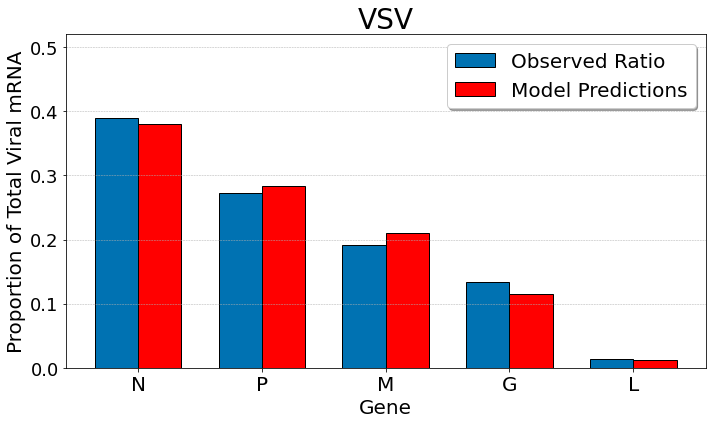

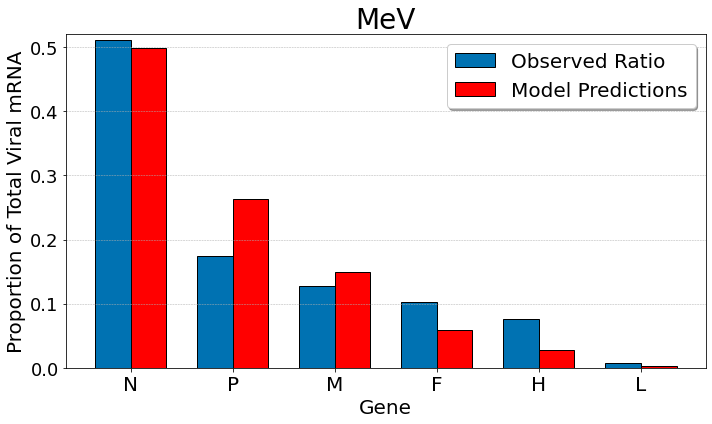

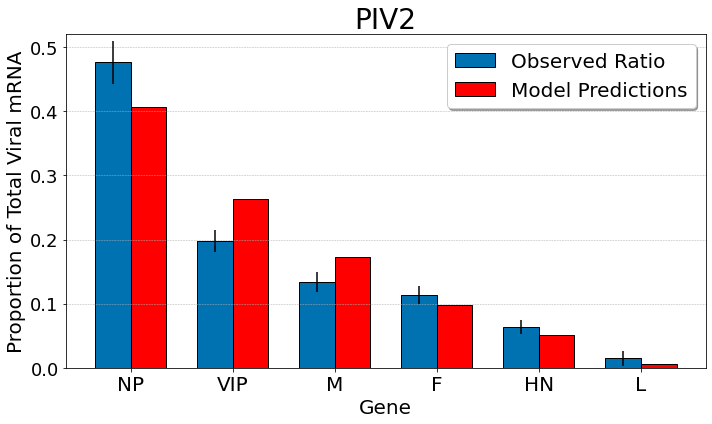

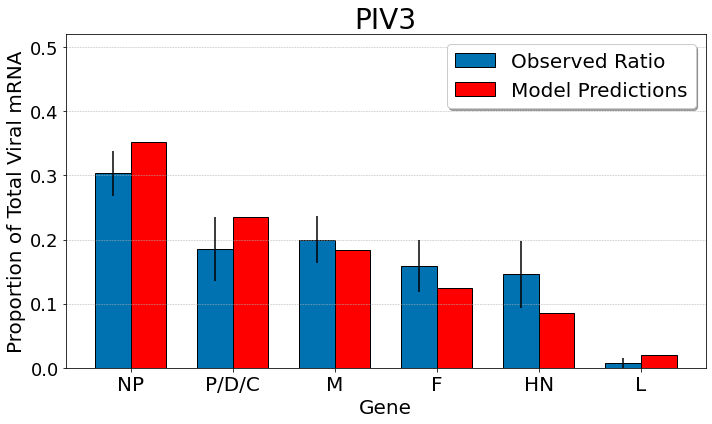

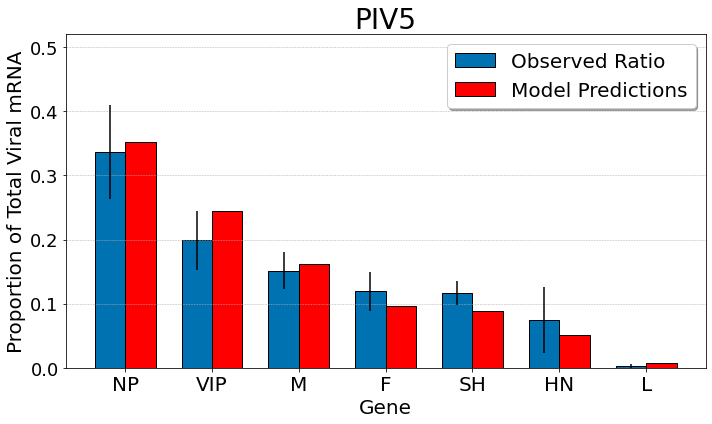

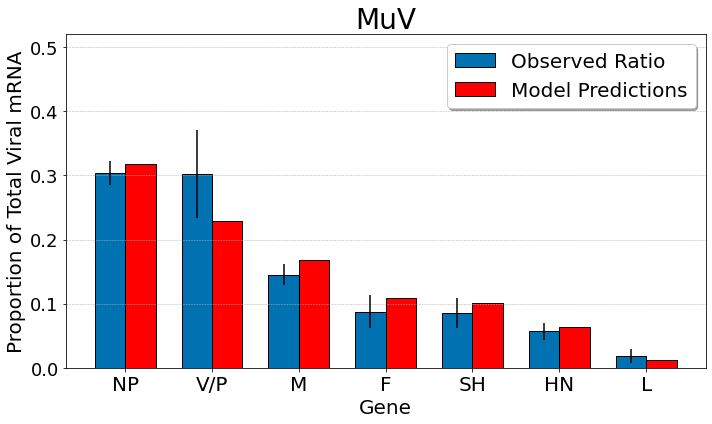

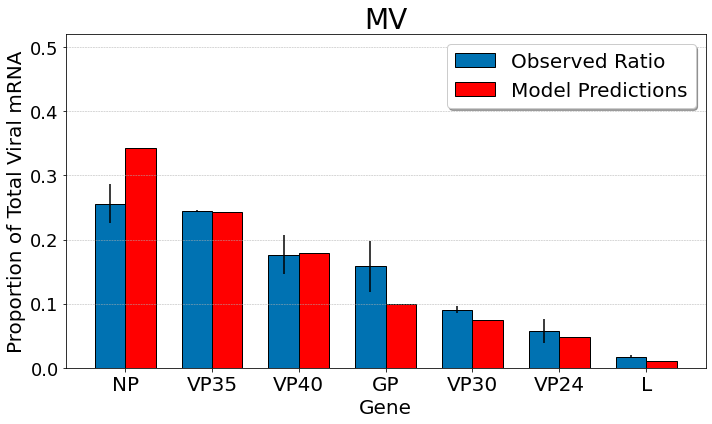

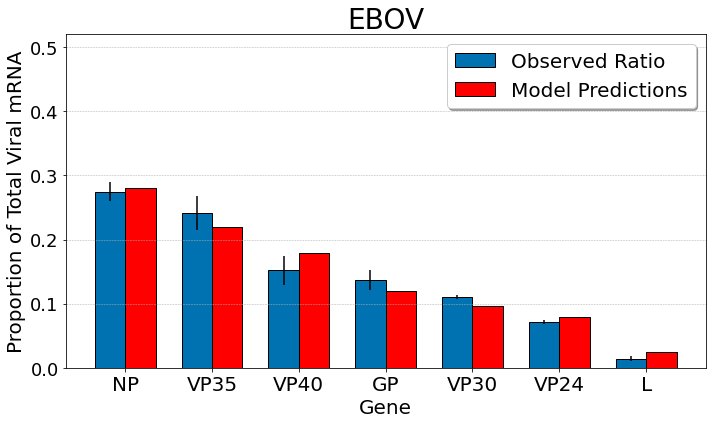

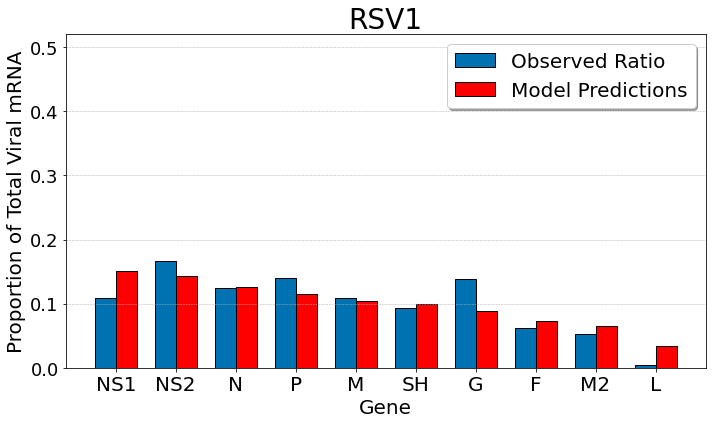

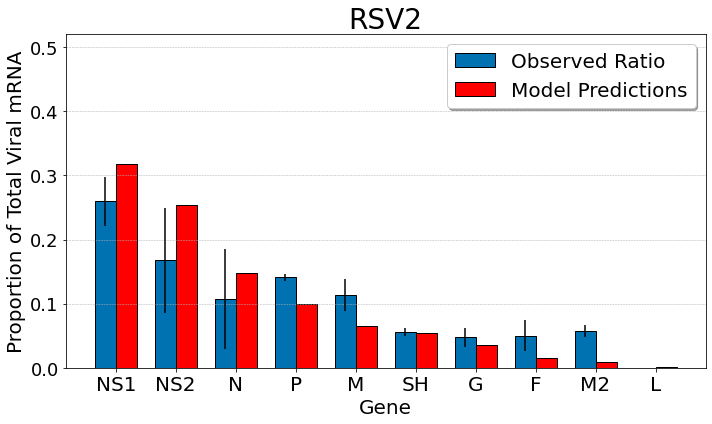

In [18]:
for i in range(len(viruses)):
    genome_pos = virus_genome_pos[i]
    pars = best_fit_pars.iloc[i]
    pred = np.array([pars**x for x in genome_pos])
    pred_norm = pred/np.sum(pred)
    
    categories = virus_gene_names[i]
    indices = np.arange(len(categories))
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    # Create bars
    bar_width = 0.35
    ax.set_title(f'{viruses[i]}', fontsize=28)
    # Create bars for virus_means[i]
    ax.bar(indices - bar_width/2, virus_means[i], width=bar_width, yerr= 2 * np.array(virus_sd[i]), color='#0072B2', edgecolor='black', label='Observed Ratio')
    # Increase y-axis label size
    ax.tick_params(axis='y', labelsize=18)
    # Create bars for pred_norm
    ax.bar(indices + bar_width/2, pred_norm, width=bar_width, color='red', edgecolor='black', label='Model Predictions')
    # Set legend with improved positioning and styling
    ax.legend(loc='best', fontsize=20, frameon=True, shadow=True)
    # Set labels, title, and ticks
    ax.set_xticks(indices)
    plt.ylim([0,.52])
    ax.set_xticklabels(categories, fontsize=20)
    ax.set_ylabel('Proportion of Total Viral mRNA', fontsize=20)
    ax.set_xlabel('Gene', fontsize=20)
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(f"Figures/Fig1/{viruses[i]}_Gradients.svg")
    plt.show()   
    
    
    

In [20]:
dfs = pd.DataFrame()
for i in range(len(viruses)):
    df = pd.read_csv((f"Top_100_Fit_Stats/{viruses[i]}_fits.csv"))
    dfs = pd.concat([dfs, df])
dfs.iloc[:,0] = viruses
dfs.to_csv("File2-Top_100_Fit_Stats/All_Viruses_Simple_Gradient.csv")